# Lending Club Case Study

<font color='red'> This is an exploratory data analysis of a financial dataset with the intention of seeing any patterns that could be tied to a loan applicant's ability to full repay a loan </font>

In [1]:
#importing necessary libraries for data manipulation and visualisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#ignore sns warnings

In [2]:
#ensuring i am in the correct direcotry with data file
import os

os.getcwd()

'C:\\Users\\micke\\OneDrive\\Documents\\Git_Projects\\lending_club_case_study'

#### Directory is correct

In [3]:
#loading the dataset

loan = pd.read_csv("loan.csv")
loan.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#let's see the shape of our dataframe
loan.shape

(39717, 111)

39717 rows and 111 columns 
this seems odd though since the data_dictionary file mentions 115 columns

In [5]:
#let's see the basic info for each column, dtypes
loan.info(verbose=True)

#without the verbose parameter we only get the memory usage and summation of data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [6]:
#there aare a significant number of columns. 
#Let's check for columns with large numbers of nulls to exclude from analysis


pd.options.display.max_rows = 4000

loan.isnull().mean()*100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

<font color='black'> Quite a few columns have more than 50% null values. These fields can not contribute to analysis so they should be dropped </font>


In [7]:
#removing columns with high number of nulls
#threshold of > 30%

threshold = 0.3

for col in loan:
    if loan[col].isnull().mean() > threshold:
        loan.drop(col, axis=1, inplace=True)

        
loan.isnull().mean()*100
    


id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [8]:
#let's  get the current shape

loan.shape

(39717, 53)

half the columns in the dataframe were dropped making it much more manageable

In [9]:
#the id column should be unique as each loan shopuld have a new id
#checking column's uniqueness

loan['id'].nunique()

39717

No duplicate rows to be removed

continuing with cleaning, we should check the url column as it may be possible to split it. Additonally, a look at the desc column as well. It may not be necessary 

In [10]:
pd.set_option('display.max_colwidth', None)
#without this, we can not see the full URL

loan['url'].head()

0    https://lendingclub.com/browse/loanDetail.action?loan_id=1077501
1    https://lendingclub.com/browse/loanDetail.action?loan_id=1077430
2    https://lendingclub.com/browse/loanDetail.action?loan_id=1077175
3    https://lendingclub.com/browse/loanDetail.action?loan_id=1076863
4    https://lendingclub.com/browse/loanDetail.action?loan_id=1075358
Name: url, dtype: object

#### the url column does not actually tell you much, just provides a link to the loan as mentioned in ther data dictionary. Will remove this column as well 

In [11]:
loan.drop('url', axis=1, inplace=True)
loan.shape

(39717, 52)

In [12]:
#taking a look at dataset again 
loan.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### Quite a few columns seem to only have values of 0. Will describe and remove any columns found with min and max of 0

In [13]:
pd.set_option('display.max_columns', None)
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


### Columns with all zeros

- collections_12_mths_ex_med
- acc_now_delinq
- chargeoff_within_12_mths	
- delinq_amnt	
- tax_liens

In [14]:
#dropping the columns above

for col in loan.describe().columns:
    if loan[col].max() == 0:
        loan.drop(col, axis=1, inplace=True)
        
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0.0


In [15]:
loan.shape

(39717, 47)

Down to 47 columns. Next step should be dropping other columns not needed. 
Some columns can only be populated after a loan is approved, and thus does not help in highlighting features of a possible default.
Post approval columns will be dropped

#### Post approval fields to be removed
- recoveries 
- issue_d
- delinq_2yrs
- revol_bal
- revol_util
- out_prncp
- out_prncp_inv
- total_pymnt
- total_pymnt_inv
- total_rec_int
- total_rec_late_fee
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt

#### Fields That are no longer needed
- ID is all unique so this can be removed since this is not a per account analysis
- member_id as well


In [16]:
#removing the aforementioned columns

cols = ['recoveries','issue_d','delinq_2yrs','revol_bal','revol_util','out_prncp','out_prncp_inv','total_pymnt',
        'total_pymnt_inv','total_rec_int','total_rec_late_fee','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
        'id','member_id']


for col in cols:
    loan.drop(col, axis=1,inplace=True)
    
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,initial_list_status,total_rec_prncp,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,Jan-85,1,3,0,9,f,5000.00,May-16,1,INDIVIDUAL,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,bike,309xx,GA,1.00,Apr-99,5,3,0,4,f,456.46,Sep-13,1,INDIVIDUAL,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,Nov-01,2,2,0,10,f,2400.00,May-16,1,INDIVIDUAL,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,other,personel,917xx,CA,20.00,Feb-96,1,10,0,37,f,10000.00,Apr-16,1,INDIVIDUAL,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Current,n,other,Personal,972xx,OR,17.94,Jan-96,0,15,0,38,f,2475.94,May-16,1,INDIVIDUAL,0.0



#### Standardisation of numbers and text fields and final column removal

* term - consider making numeric if the months are continuous
* int_rate should be float. must remove the %
* emp_length the less than and plus should be removed as well as years
* earliest_cr_line - convert to datetime currently MM-YY - DD-MM-YY
* emp_title - check if this fields is truly free text, if so will drop
* title - if not set categires, will remove
* zip_code while good, we have states and this should be enough. will remove
* last_credit_pull_d - will drop. Field can not tell you much without year
* policy_code should be object


    
                

In [17]:
#checking term to determine whether to change dtype
loan['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

only 36 and 60 month terms, there is no need to change this to a quantitative variable as we can more easily compare 36 and 60 months

In [18]:
#changing interest rate dtype

loan['int_rate'] = loan['int_rate'].apply(lambda x : float(x.replace('%','')))
loan.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
pymnt_plan               object
purpose                  object
title                    object
zip_code                 object
addr_state               object
dti                     float64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
total_acc                 int64
initial_list_status      object
total_rec_prncp         float64
last_credit_pull_d       object
policy_code               int64
application_type         object
pub_rec_bankruptcies    float64
dtype: o

int_rate is now float

In [19]:
#changing emp_legnth

loan['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

Only <1 and 10+ are categorical.
Will assume <1 to be 0 since time is in years. Also since there is no 10 and 10+ separate we can assume that 10 and 10+ are treated as the same therefore I will change 10+ to simply 10 to simply analysis

In [20]:
#removing < and + from field and renaming so we know it is in years
loan['emp_length'] = loan['emp_length'].astype('str').apply(lambda x : 0 if x.startswith('<') 
                                                            else( 10 if x.startswith('10') else x.split()[0]))

loan.rename(columns={'emp_length' : 'emp_length_years'}, inplace=True)

loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,initial_list_status,total_rec_prncp,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,Jan-85,1,3,0,9,f,5000.00,May-16,1,INDIVIDUAL,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Charged Off,n,car,bike,309xx,GA,1.00,Apr-99,5,3,0,4,f,456.46,Sep-13,1,INDIVIDUAL,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,Nov-01,2,2,0,10,f,2400.00,May-16,1,INDIVIDUAL,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Fully Paid,n,other,personel,917xx,CA,20.00,Feb-96,1,10,0,37,f,10000.00,Apr-16,1,INDIVIDUAL,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Current,n,other,Personal,972xx,OR,17.94,Jan-96,0,15,0,38,f,2475.94,May-16,1,INDIVIDUAL,0.0


In [21]:
loan['emp_length_years'].value_counts()

10     8879
0      4583
2      4388
3      4095
4      3436
5      3282
1      3240
6      2229
7      1773
8      1479
9      1258
nan    1075
Name: emp_length_years, dtype: int64

There are still nan for employment length. Will remove those rows

In [22]:
loan = loan[loan['emp_length_years']!='nan']
loan['emp_length_years'] = loan['emp_length_years'].astype(str)

In [23]:
#dealing with the month yy column
#dates before 1969 that are in the yy format get mapped as 20yy so these should be handled as well
import datetime as dt

loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'], format ="%b-%y")
loan['earliest_cr_line'] = loan['earliest_cr_line'].apply(lambda x: x - dt.timedelta(days=365*100) if x > dt.datetime.now() else x)


In [24]:
loan.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,initial_list_status,total_rec_prncp,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,1985-01-01,1,3,0,9,f,5000.00,May-16,1,INDIVIDUAL,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Charged Off,n,car,bike,309xx,GA,1.00,1999-04-01,5,3,0,4,f,456.46,Sep-13,1,INDIVIDUAL,0.0


In [25]:
#emp_title check

loan['emp_title']


0                               NaN
1                             Ryder
2                               NaN
3               AIR RESOURCES BOARD
4          University Medical Group
                    ...            
39712               FiSite Research
39713    Squarewave Solutions, Ltd.
39714                           NaN
39715                           NaN
39716              Evergreen Center
Name: emp_title, Length: 38642, dtype: object

Will drop this column, it is not necessary

In [26]:
loan.drop('emp_title', axis=1,inplace=True)

In [27]:
#checking title column

loan['title'].value_counts()

Debt Consolidation             2144
Debt Consolidation Loan        1691
Personal Loan                   641
Consolidation                   511
debt consolidation              486
                               ... 
Shannon's personal loan           1
credit card finally gone!!!       1
Taxes 2011                        1
Dc                                1
JAL Loan                          1
Name: title, Length: 19148, dtype: int64

This column is not needed.

In [28]:
loan.drop('title', axis=1,inplace=True)

In [29]:
#dropping zip_code and last_credit_pull_d

loan.drop(['zip_code','last_credit_pull_d'], axis=1,inplace=True)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length_years,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,initial_list_status,total_rec_prncp,policy_code,application_type,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Fully Paid,n,credit_card,AZ,27.65,1985-01-01,1,3,0,9,f,5000.00,1,INDIVIDUAL,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Charged Off,n,car,GA,1.00,1999-04-01,5,3,0,4,f,456.46,1,INDIVIDUAL,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Fully Paid,n,small_business,IL,8.72,2001-11-01,2,2,0,10,f,2400.00,1,INDIVIDUAL,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Fully Paid,n,other,CA,20.00,1996-02-01,1,10,0,37,f,10000.00,1,INDIVIDUAL,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Current,n,other,OR,17.94,1996-01-01,0,15,0,38,f,2475.94,1,INDIVIDUAL,0.0


changing policy code to object. Also forgot to remove total_rec_prncp as this is also a post approval field. Additionally, the sub grade of the loan is not neccessary as it will split loan_status too much. will drop as well

In [30]:
loan['policy_code'] = loan['policy_code'].astype('str')
loan.drop(['total_rec_prncp','sub_grade'], axis=1,inplace=True)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length_years,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,initial_list_status,policy_code,application_type,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,10,RENT,24000.0,Verified,Fully Paid,n,credit_card,AZ,27.65,1985-01-01,1,3,0,9,f,1,INDIVIDUAL,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,0,RENT,30000.0,Source Verified,Charged Off,n,car,GA,1.00,1999-04-01,5,3,0,4,f,1,INDIVIDUAL,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,10,RENT,12252.0,Not Verified,Fully Paid,n,small_business,IL,8.72,2001-11-01,2,2,0,10,f,1,INDIVIDUAL,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,10,RENT,49200.0,Source Verified,Fully Paid,n,other,CA,20.00,1996-02-01,1,10,0,37,f,1,INDIVIDUAL,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,1,RENT,80000.0,Source Verified,Current,n,other,OR,17.94,1996-01-01,0,15,0,38,f,1,INDIVIDUAL,0.0


#### outlier review and treatment

In [31]:
loan.shape

(38642, 25)

down to 25 columns and 38K rows

#### Analysis of numeric fields

<Figure size 432x288 with 0 Axes>

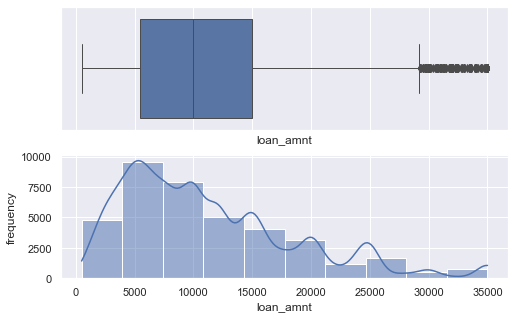

<Figure size 576x360 with 0 Axes>

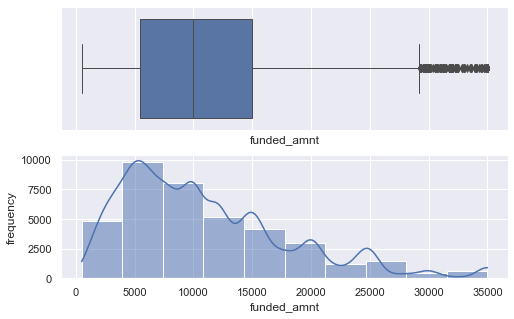

<Figure size 576x360 with 0 Axes>

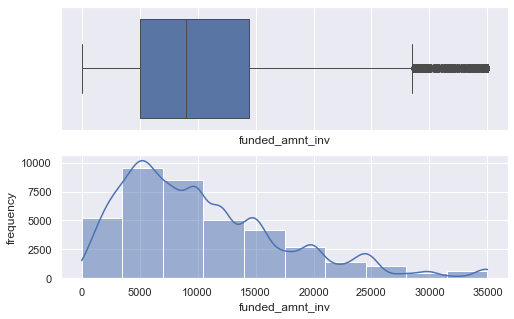

<Figure size 576x360 with 0 Axes>

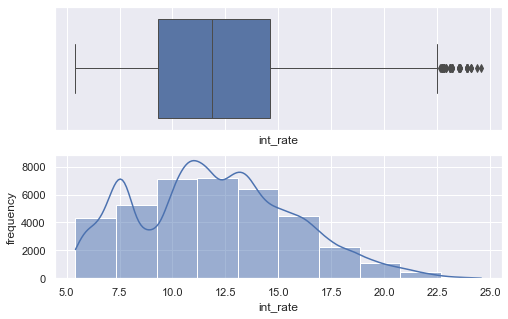

<Figure size 576x360 with 0 Axes>

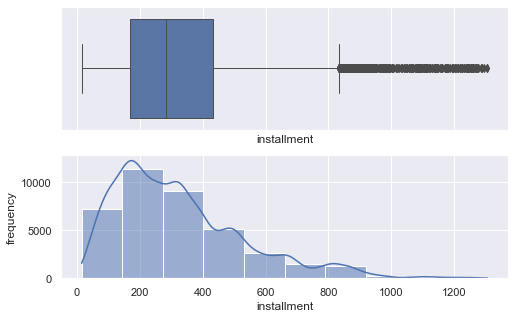

<Figure size 576x360 with 0 Axes>

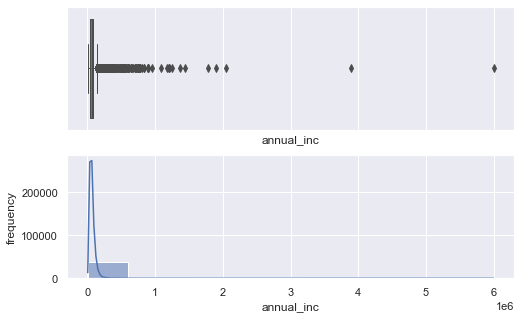

<Figure size 576x360 with 0 Axes>

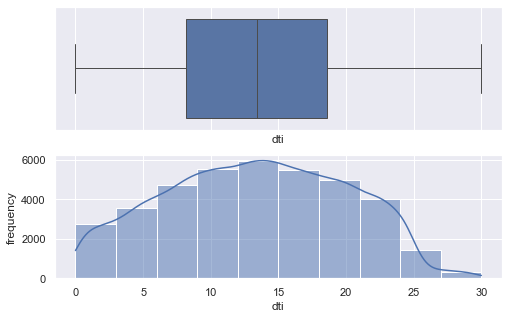

<Figure size 576x360 with 0 Axes>

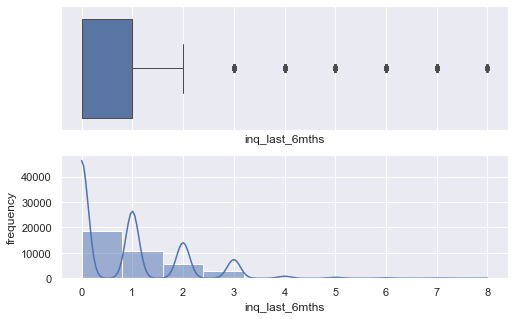

<Figure size 576x360 with 0 Axes>

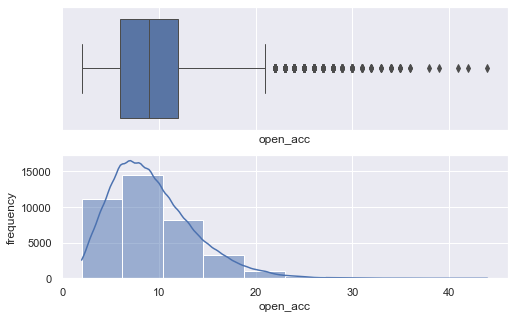

<Figure size 576x360 with 0 Axes>

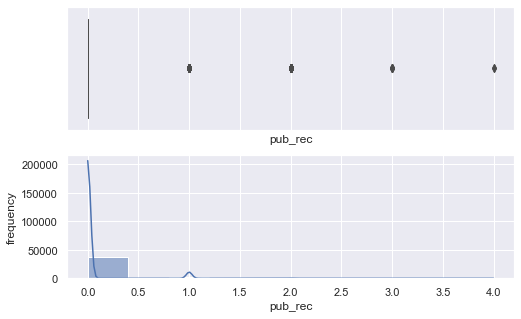

<Figure size 576x360 with 0 Axes>

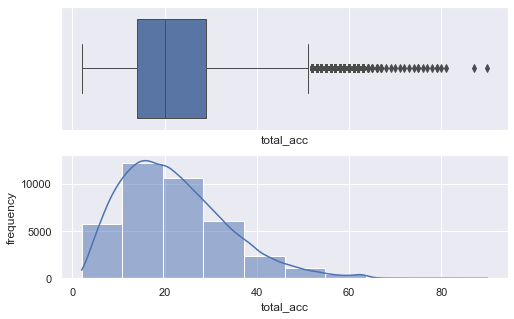

<Figure size 576x360 with 0 Axes>

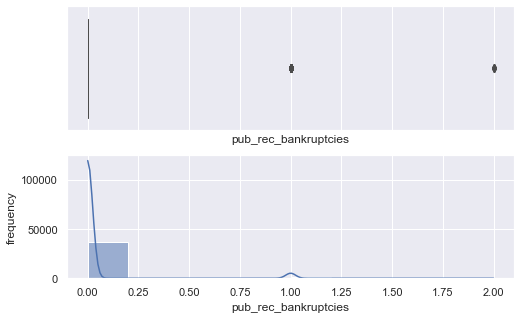

In [32]:
#building boxplots for each numeric to get an idea of the outliers

#loop through only columsn in describe() since only they can have boxplots
#loop creates pairs of box + hist for each column in loop to see distribution as well as outliers on that distrbution

for col in loan.describe().columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize": (8,5)})
    
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel=col, ylabel='frequency')
    sns.boxplot(loan[col], ax=ax_box, linewidth=1.0,orient='h')
    sns.histplot(loan[col], ax=ax_hist, bins=10, kde=True)
    plt.show()
    



* will remove outliers from annual_inc then run loop again to see the distributions after this. DOing this first since they are so many outliers, which squish the boxplot

In [33]:
# will use only without the 95th quantile

#filter
filter1 = loan['annual_inc'].quantile(0.95)

#removing outliers from fields
loan = loan[loan['annual_inc'] <= filter1]

loan.shape



(36709, 25)

<Figure size 576x360 with 0 Axes>

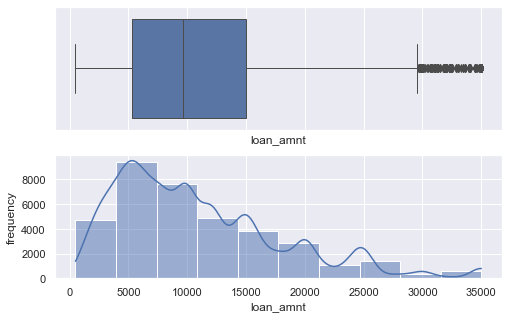

<Figure size 576x360 with 0 Axes>

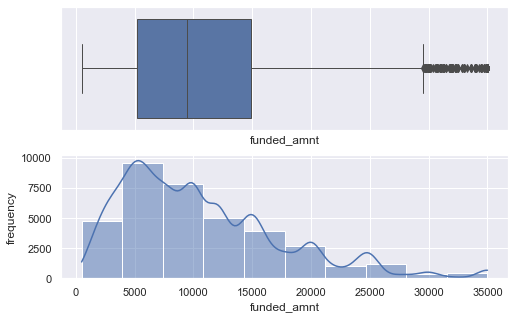

<Figure size 576x360 with 0 Axes>

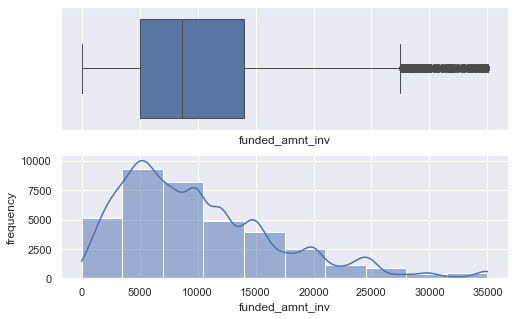

<Figure size 576x360 with 0 Axes>

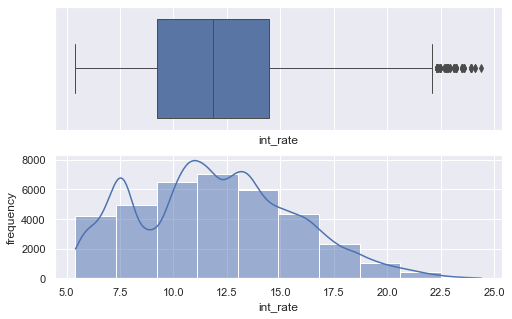

<Figure size 576x360 with 0 Axes>

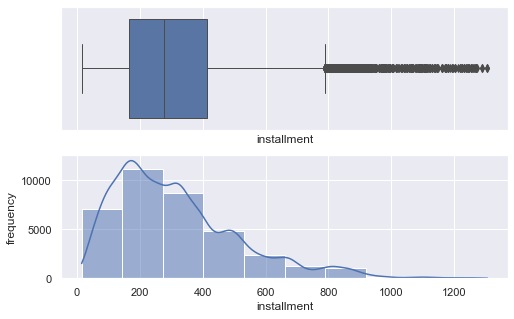

<Figure size 576x360 with 0 Axes>

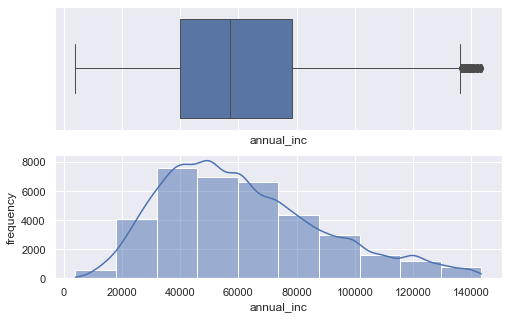

<Figure size 576x360 with 0 Axes>

In [ ]:
for col in loan.describe().columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize": (8,5)})
    
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel=col, ylabel='frequency')
    sns.boxplot(loan[col], ax=ax_box, linewidth=1.0, orient='h')
    sns.histplot(loan[col], ax=ax_hist, bins=10, kde=True)
    plt.show()

pub_rec_bankruptcies mainly has zeros and two outliers. This column can be dropped if confirmed
removing some outliers from loan_amnt. Those over 30K as most values fall below this according to the histogram. will leave installment as is since we can more easily see if higher installment payments have higher default rates. 

May have overlooked that total_acc and open_acc. They have a similar distribution as is expected. will use only total_acc for this analysis then. Will drop open_acc

In [ ]:
loan = loan[loan['loan_amnt'] <=30000]
loan.shape

In [ ]:
loan['pub_rec_bankruptcies'].value_counts()

It may be best to leave them, as we can see what proportion of those with 1 or more bankruptcy have charge off

In [ ]:
loan.drop('open_acc', axis=1, inplace=True)
loan.shape

In [ ]:
loan['loan_status'].value_counts()

Now we only need to see the completed loans so no current loans. Will remove these. do one more visualisation of outliers then proceed if all is acceptable

In [ ]:
loan = loan[loan['loan_status'] != 'Current']
loan.shape

In [ ]:
for col in loan.describe().columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize": (8,5)})
    
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel=col, ylabel='frequency')
    sns.boxplot(loan[col], ax=ax_box, linewidth=1.0, orient='h')
    sns.histplot(loan[col], ax=ax_hist, bins=10, kde=True)
    plt.show()

Before beginning further analysis income should be split into groups as well as interest rates and total_acc to make analysis easier of these fields

In [ ]:
#describing to get an idea of the ranges 

loan[['annual_inc','int_rate','total_acc']].describe()


- income starts at 4K to 143K. If we choose 4 bins and set the upper limit to 144K we get splits of 35
  4k-39K, 39K-74K, 74K-109K, 109K-144K
- interest rate starts at 5.42 to 24.5 - min of 5 and max of 25 then 5%-10%, 10%-15%, 15%-20%, 20%-25%
- total_acc 2-90 min of 2 and max 90. using 4 bins of 22 each. 2-24, 24-46, 46-68, 68-90

In [ ]:
#making the groups
income_bins = [4000,39000,74000,109000,144000]
income_labels =['4K-39K','39K-74K','74K-109K','109K-144K']
loan['annual_class'] = pd.cut(loan['annual_inc'], bins=income_bins, include_lowest=True, labels=income_labels)

int_bins = [5,10,15,20,25]
int_labels = ['5%-10%','10%-15%','15%-20%','20%-25%']
loan['interest_class'] = pd.cut(loan['int_rate'], bins=int_bins, include_lowest=True, labels=int_labels)

total_bins = [2,24,46,68,90]
total_labels =['2-24','24-46','46-68','68-90']
loan['total_acc_class'] = pd.cut(loan['total_acc'], bins=total_bins, include_lowest=True, labels=total_labels)


loan.head(10)



### Working with categorical fields 

#### Number of Defaulters and Fully Paid

In [ ]:
#quick view at the number of defaulters
plt.rcParams['figure.dpi'] = 100 #high resolution
ax = sns.countplot(data=loan, x='loan_status')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

Price of default

In [ ]:
#how much do defaulters cost us
plt.rcParams['figure.dpi'] = 100 #high resolution
ax = sns.boxplot(data=loan, y='loan_status',x='funded_amnt', palette='Set1')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
# order results high to low
purpose_order = loan['purpose'].value_counts().index

In [ ]:
#what are the most common reasons for getting a loan
plt.rcParams['figure.dpi'] = 100 #high resolution
sns.countplot(data=loan, y='purpose', palette='Set1', order = purpose_order)

plt.show()

Most loans are actually repaid in full. Indicating that charge offs are not very common in the dataset. It should be noted that this also shows the dataset is quite imbalanced with almost all loans being classed as fully paid. 

Additionally, while charge offs are less common, they still account for more than half the value of all funded loan amount.

It can also be seen that debt consolidation, credit card debt, other and home improvement account for most of the loan borrowing



#### Term of Length with respect to Loan Status

In [ ]:
plt.rcParams['figure.dpi'] = 100 #high resolution
ax = sns.countplot(data=loan, x='term',hue='loan_status', palette ='Set2')
for container in ax.containers:
    ax.bar_label(container)
plt.show()


Clients seeking longer term loans are more likely to default.

#### Interest Rate vs Term by Loan Status

In [ ]:
plt.rcParams['figure.dpi'] = 100 #high resolution
ax = sns.barplot(data=loan, x='term',y='int_rate',hue='loan_status', palette ='husl')
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.show()


For a loan of 36 months, if the assigned interest rate exceeds 11% then this increases the chance of default
For a loan of 60 months, if the assigned interest rate exceeds 14% then this increases the chance of default

#### Loan Grade by Loan Status

In [ ]:
#adding perc from comment https://stackoverflow.com/a/67076347 on stackoverflow 
# by user myles - https://stackoverflow.com/users/4852724/myles
# dated Apr 13, 2021 at 13:58
# some only aware of how to add 

def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

In [ ]:
#taking a look at grade and default

plt.rcParams['figure.dpi'] = 100 #high resolution
ax = sns.countplot(data=loan, x='grade', hue='loan_status', palette='husl', order = ['A','B','C','D','E','F','G'])
ax.set(yscale="log")
barPerc(loan,'grade',ax)
plt.show()

As the grade of the loan moved from A to G, the percentage of defaulters to fully paid increases, indicating that clients with lower grade loans are riskier. 

In [ ]:
#grade and income interact
plt.rcParams['figure.dpi'] = 100 #high resolution
ax = sns.barplot(data=loan, x='grade',y='annual_inc',hue='loan_status', palette ='Set2', order = ['A','B','C','D','E','F','G'])
barPerc(loan,'grade',ax)
plt.show()


There does not appearf to be a significant difference in percentage of defaults when income is taken into consideration. 

In [ ]:
plt.rcParams['figure.dpi'] = 100 #high resolution
ax = sns.barplot(data=loan, x='grade',y='int_rate',hue='loan_status', palette ='Set2', order = ['A','B','C','D','E','F','G'])
plt.show()

Regardless of grade and interest rate repayment of loans and default are not significantly different. Thus one is not more important than the other, both grade and interest rate have impact on the possibility of default

### Loan Amount and interactions with other variables 

In [ ]:
loan['loan_amnt'].describe()

Minimum of 500 and max of 30000

500,6400,12300,18200,24100,30000

5 buckets - micro, small, medium, large, very large

In [ ]:
amnt_bins = [500,5400,12300,18200,24100,30000]
amnt_labels =['0.5K-6.4K','6.4K-12.3K','12.3K-18.2K','18.2K-24.1K','24.1K-30K']
loan['loan_amnt_class'] = pd.cut(loan['loan_amnt'], bins=amnt_bins, include_lowest=True, labels=amnt_labels)


loan.head(10)



In [ ]:
plt.rcParams['figure.dpi'] = 100 #high resolution
ax = sns.countplot(data=loan, x='loan_amnt_class',hue='loan_status', palette ='Set2', order = amnt_labels)
ax.set(yscale='log')
barPerc(loan,'loan_amnt_class',ax)
plt.show()

In [ ]:
plt.rcParams['figure.dpi'] = 100 #high resolution
sns.barplot(data=loan, y='loan_amnt', x = 'grade',hue='loan_status', palette ='Set2', order = ['A','B','C','D','E','F','G'])

plt.show()

Clients requesting larger sums of money are more likely to have a charge off. 
Clients wanting to borrow >12.3K have a higher default rate than those below.
400 to 6400 defaulted 14% of the time but 24K and heigher defaulted 21% of the time

loan amounts of more than 15.5K and graded F are more likely to default than other loan amounts and grades.

In [ ]:
plt.rcParams['figure.dpi'] = 100 #high resolution
ax = sns.barplot(data=loan, x='annual_class',y='loan_amnt',hue='loan_status', palette ='Set2', order = income_labels)
#ax.set(yscale='log')
barPerc(loan,'annual_class',ax)
plt.show()

Again regardless of income class, if the client requests a larger loan their default risk increases

#### Installment Amount and the rate of default 

In [ ]:

filter2 = loan[loan['loan_status']=='Fully Paid']
filter3 = loan[loan['loan_status']!='Fully Paid']

fig = plt.figure(figsize=(10,6))
sns.histplot(filter2, x='installment', bins=10, kde=True, color='Green')
sns.histplot(filter3, x='installment', bins=10, kde=True, color='Red')
fig.legend(labels=['Fully Paid','Default'])
plt.show()

The rate of default does not appear tied to the the installment amount as the overall distribution between fully paid and default is the same

#### Employment length and the rate of default

In [ ]:
#checking employment length


plt.rcParams['figure.dpi'] = 100 #high resolution
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots(2,1, sharex=True, figsize = (10,10))


sns.countplot(data=filter2, x=filter2['emp_length_years'].astype(str), palette ='Set1', ax=ax[0])
ax[0].title.set_text('Employment Length for Fully Paid')

sns.countplot(data=filter3, x=filter3['emp_length_years'].astype(str), palette ='Set1',ax=ax[1])
ax[1].title.set_text('Employment Length for Default')

                       
plt.show()

Though the x axis order is not ideal, what stands out most here is that applicants with 0 years employment length paid their loans back the most while those with 10 or more years paid their loans back the least. This could indicate that persons with long term employment requesting loans are more likely to default

In [ ]:
emp_length_order = [str(x) for x in range(0,11)]
emp_length_order

In [ ]:
#checking how loan amount and employment 

plt.rcParams['figure.dpi'] = 100 #high resolution

plt.figure(figsize=(10,10))
sns.barplot(data=loan, y='loan_amnt', x='emp_length_years', hue='loan_status',palette ='Set2', order =emp_length_order)

plt.show()


As the length of employment increases so do the request loan amounts. This is likely why longer terms of employment have have default rates than shorter terms. Smaller loans are more easily repaid than larger loans. 
Therefore a client with a longer term of employment that requests a large loan is a more likely defaulter than a shorter length of employment and smaller amount

In [ ]:
#pivot table of above data using median

round(loan.pivot_table(index=loan['emp_length_years'].astype(int), columns='loan_status', values='loan_amnt', aggfunc=np.median),2)

In fact, as seen in the graph and the pivot table, regardless of length of employment, defaulters tend to request larger sums of money compared to the median value for the fully paid group.

#### State and the Rate of default

In [ ]:
#creating a pivot table of state and loan status
#remvoing states with very low charge off as there is not enough
#data to make a concrete conclusion
#also choosing states with more than 15% charge off

tmp = loan.pivot_table(index='addr_state', columns='loan_status',values='annual_inc',  aggfunc='count')
tmp['Overall_Default_%'] = (tmp['Charged Off']/(tmp['Fully Paid']+tmp['Charged Off']))*100
tmp.sort_values(by=['Overall_Default_%','Charged Off','Fully Paid'], inplace=True, ascending=False)
tmp_over_15 = tmp[(tmp['Charged Off']> 5) & (tmp['Overall_Default_%'] >= 15)]
tmp_over_15

States of NV, AK, HI, FL, NM, OR, MO, NJ, GA, CA, MD, NC, WA have the highest rates of default with 21% of NV loans ending in default.

In [ ]:
states_order = loan['addr_state'].value_counts().sort_index().index

In [ ]:

plt.rcParams['figure.dpi'] = 100 #high resolution

plt.figure(figsize=(30,30))
sns.catplot(data=loan[loan['addr_state'].isin(tmp_over_15.index)], y='funded_amnt', x='addr_state', hue='loan_status',
            palette ='Set1',kind="bar", aspect = 2.5)
plt.xticks(rotation=30)
plt.show()

If the applicant is from any of the aforementioned states and requests a loan amount over 9.5K, there probability of default increases. Though this is untrue for HI where higher loan values have are repaid more than lower paid amounts

#### Home onwership and income classes and their impact on default

In [ ]:
loan['home_ownership'].value_counts()

In [ ]:
plt.rcParams['figure.dpi'] = 100 #high resolution

plt.figure(figsize=(10,10))
ax = sns.barplot(data=loan[loan['home_ownership'] != 'NONE'], x='home_ownership',y='funded_amnt', hue='loan_status',palette ='Set2')
barPerc(loan[loan['home_ownership'] != 'NONE'], 'home_ownership',ax)
plt.show()

None was removed as there are only 3 values and there is no definition for these in the data dictionary.
That being said, the default to fully paid percentage remaisn relatively stable for Renters, home owners and mortgage payers but those class as other, likely wwith no fixed address are higher risk for lending.

#### Earliest line credit date and how it related to loan status

In [ ]:
#does the length of time an applicant has been applying for credit affect how much they borrow


plt.rcParams['figure.dpi'] = 100 #high resolution
plt.figure(figsize=(10,10))
sns.countplot(data=loan, x=loan['earliest_cr_line'].dt.year, hue='loan_status', palette='Set1')

plt.xticks(rotation=90)
plt.show()


In [ ]:
#taking a closer look from 1990 onward

loan_1990 = loan[loan['earliest_cr_line'].dt.year >= 1990]

plt.figure(figsize=(10,10))
sns.countplot(data=loan_1990, x=loan_1990['earliest_cr_line'].dt.year, hue='loan_status', palette='Set1')
plt.xticks(rotation=90)
plt.show()


There does not seem to be a link between the earliest line of credit and default. In fact as the number of fully paid loans increases so do the number of defaults. This is expected as there are more loans available per year and thus more can default but the percentage of default did not necessarily change

#### Bankruptcies and loan status

In [ ]:
#bankrupcies and how they affect loan status

plt.figure(figsize=(10,10))
ax = sns.countplot(data=loan, x='pub_rec_bankruptcies', hue='loan_status', palette='Set1')
ax.set(yscale="log")
barPerc(loan,'pub_rec_bankruptcies',ax)
plt.show()


As the number of bankruptcies increase so too does the probability of default. 22% of those with a single bankrupcy defaulted while only 14% did for zero

#### Number of Accounts and how it related to loan status

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.countplot(data=loan, x='total_acc_class', hue='loan_status', palette='Set1')
ax.set(yscale='log')
barPerc(loan,'total_acc_class',ax)
plt.show()

Having many accounts alone does not immediately indicate an applicant is at risk of default as the ratio of paid to default stays relatively the same for each bucket

In [ ]:

plt.figure(figsize=(10,10))
sns.catplot(data = loan, y='annual_inc', x='total_acc_class', hue='loan_status', kind='bar', palette='Set1',aspect = 2)

plt.show()

clients with less income tend to have fewer accounts. 
Additionally, regardless of the number of accounts, the clients that fully paid their loans back had higher income.
Therefore in considering the number of accounts, the annual income should be given a closer look.
- 2-24 acc > 50K = less default
- 24-46 acc > 65K = less default
- 46-68 acc > 75K = less default
- 68-90 acc the total income matters less as default and paid back are nearly equal

In [ ]:
plt.figure(figsize=(10,10))
sns.catplot(data = loan, y='int_rate', x='total_acc_class', hue='loan_status', kind='bar', palette='Set1',aspect = 2)

plt.show()

As the number of accounts and interest increases so does the chance of a default. Clients with 24+ accounts and an interest rate below 12.5% defaulted less often than those with higher rates. Again indicating a higher interest rate loan has a higher default rate

In [ ]:
loan.columns

### verification of income and how it impacts loan status

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.countplot(data=loan, x='verification_status', hue='loan_status', palette='Set1')
barPerc(loan,'verification_status',ax)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.catplot(data = loan, y='annual_inc', x='verification_status', hue='loan_status', kind='bar', palette='Set1',aspect = 2)

plt.show()

Verification status of employment income does not have much impact on a client's ability to repay their loan. In fact, unverfiied has a charge off % of 13 while verified is 17%.
Though, income verfication shows a trend in the amount of annual income. Verified income over 60K tends to pay back more, source verified above 55K paying more more often and the same for not verified. implying that persons who make more or more capable of repaying their loans.

#### purpose and how it impacts repayment

In [ ]:
purpose_pivot = loan.pivot_table(index='purpose', columns='loan_status',values='loan_amnt', aggfunc='count')
purpose_pivot['Default_%'] = round((purpose_pivot['Charged Off']/(purpose_pivot['Charged Off'] +
                                                                  purpose_pivot['Fully Paid']))*100,2)
purpose_pivot.sort_values(by='Default_%', ascending=False, inplace=True)
purpose_pivot

In [ ]:
plt.figure(figsize=(10,10))
sns.catplot(data = loan, y='loan_amnt', x='purpose', hue='loan_status', kind='bar', palette='Set1',aspect = 2)
plt.xticks(rotation=90)
plt.show()

Small business loans are the most risky purpose at 27% followed by renewable energy loans.
When the loan amount is taken into consdieration, loans for debt consolodation, education,renewable energy, major purchases, small business and credit cards carry significant risk especially if those applicants are requesting larger sums. Thus it would be best to lower the amount lent for particular purposes to lower the risk of default 

## <font color='red'>  Final Observations </font>

- int rate has a significant impact on the repayment of loans. As interest rate increases, so does the proabbility of default. 
  for loans termed 36 months, rates over 11% have more defaulters and for 60 month loans, rates over 14% result in more    defaults. 
- grade of the loan also has an impact on the loan repayment. Clients with lower gradse loans have a higher probability to default. with 35% of grade G defaulting while opnly 6% of grade A do. 
- loan_amnt has an impact on the default probabilty as well. In all cases, the larger the sum of money requested for the loan, the higher the chances of default. Even with higher annual income, the rate of number of defaults is still high.
- emp_length_years persons with less than 1 year of employment pay their loans back more frequently than those of 10 or more years. This may be tied to the fact that length of employment is inversely proportion to the loan amount. Therefore a person with a fewer years of employment requesting a smaller sum is less risky
- addr_state - the location of an applicant increases the probability of default with States of NV, AK, HI, FL, NM, OR, MO, NJ, GA, CA, MD, NC, WA having default rates of 15% or more. Therefore consideration for the location of the applicant should be taken
- home_ownership, while rent, own and mortgage all fail to repay more than pay their ratios remain similar. However, those who are classed as other did not replay their loans nearly 60% of the time. Therefore, not having a fixed address is a possible sign of a future default in a client
- pub_rec_bankruptcies, as the number of public bankrupcies increases so does the proabbility of default with clients with at least one bankruptcy failing to repay their loan at least 22% of the time compared to 14% of the time with 0 bankruptcies
- purpose - loans for small business and renewable energy have high rates of default 20+%. Indicating that loans for thus purpose should be restricted. Additionally when we consider the loan amount requested, then higher amounts for  debt consolodation, education,renewable energy, major purchases, small business and credit cards carry an increased risk of default.



## <font color='red'>  Conclusions </font>

The biggest indicator of default is the amount being requested by the client. Higher loan_amnts always result in higher rates of default. This risk is increased with increasing interest rates, lower loan grades, longer terms of employment, address, lack of a fixed address, having at least one bankruptcy in the past and the purpose of the loan being for small business, credit card debt or debt consolodation.

Therefore the following are indicators of increased default risk
- loan amount > 12.3K
- int rate - >11% on a 36 month term loan and >14% on a 60 month term loan
- grade - lower than A with increased risk the lower the grade i.e B risk < G risk
- emp_length_years >=10 years 
- addr_state - being a resident of NV, AK, HI, FL, NM, OR, MO, NJ, GA, CA, MD, NC or WA 
- home_ownership - Not renting, owning or paying a mortgage for your home. That is having no fixed address.
- pub_rec_bankruptcies > 0
- purpose - loan for small business regardless of loan amount, and with higher loan amounts default increases for debt consolodation, education,renewable energy, major purchases and credit cards
